# SBRC Regression Sensitivities

Notebook for obtaining distribution network sensitivities fro  SBRC microgrid via linear regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Import SBRC network data

In [3]:
sbrc_1 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20200803 to 20200817.CSV')
sbrc_1.index = pd.to_datetime((sbrc_1['Date']+' '+sbrc_1['Time']), format='%Y/%m/%d %H:%M:%S')

In [4]:
sbrc_2 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20200826 to 20200930.CSV')
sbrc_2.index = pd.to_datetime((sbrc_2['Date']+' '+sbrc_2['Time']), format='%Y/%m/%d %H:%M:%S')

In [5]:
sbrc_3 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20201020 to 20201124.CSV')
sbrc_3.index = pd.to_datetime((sbrc_3['Date']+' '+sbrc_3['Time']), format='%Y/%m/%d %H:%M:%S')

In [6]:
sbrc = pd.concat([sbrc_1, sbrc_2, sbrc_3])

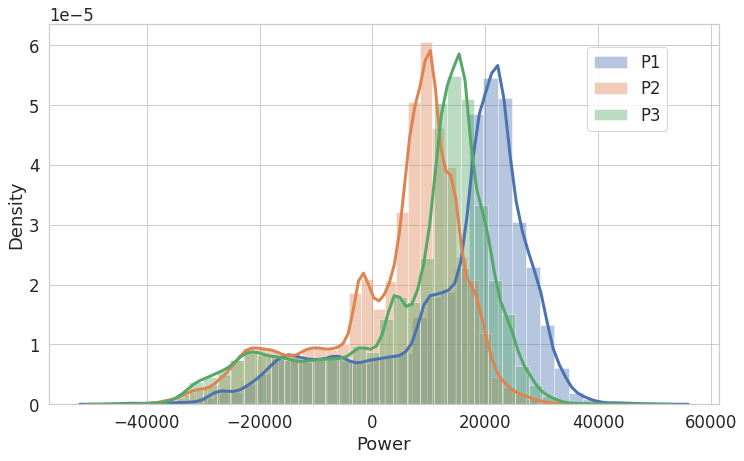

In [7]:
fig = plt.figure(figsize=(12,7))
sns.set(font_scale=1.5, style="whitegrid")
sns.distplot(sbrc['AvgP1'],bins=40, kde=True, kde_kws={"lw": 3}, label='P1')
sns.distplot(sbrc['AvgP2'],bins=40, kde=True, kde_kws={"lw": 3}, label='P2')
sns.distplot(sbrc['AvgP3'],bins=40, kde=True, kde_kws={"lw": 3}, label='P3')
fig.legend(bbox_to_anchor=(0.85, 0.85))
plt.xlabel('Power')
plt.ylabel('Density')
#plt.savefig('Phase_A_Voltage_Distribution.pdf')
plt.show()

In [8]:
sbrc.describe()[['AvgP1', 'AvgP2', 'AvgP3']]

,AvgP1,AvgP2,AvgP3
count,242474.000000,242474.000000,242474.000000
mean,14003.130562,3673.583106,7213.106931
std,14357.141315,12557.509625,14503.433593
min,-48260.000000,-43900.000000,-46850.000000
25%,8760.000000,-2290.000000,970.000000
50%,18870.000000,7460.000000,12400.000000
75%,23330.000000,11920.000000,16570.000000
max,52350.000000,39840.000000,49320.000000


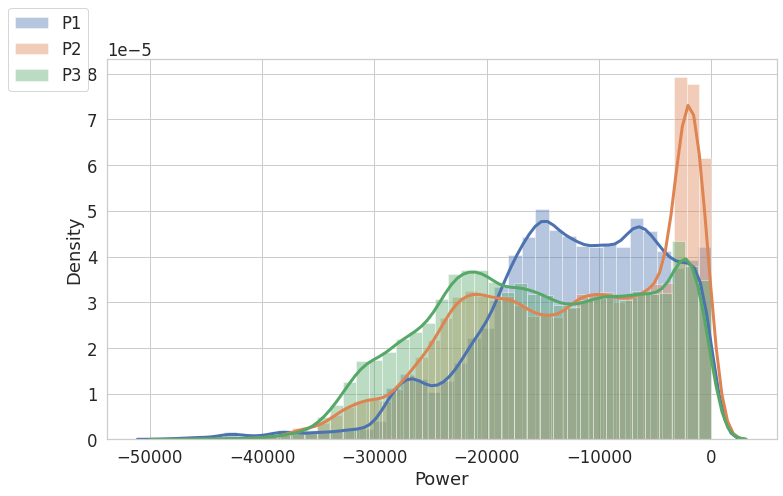

In [9]:
fig = plt.figure(figsize=(12,7))
sns.set(font_scale=1.5, style="whitegrid")
sns.distplot(sbrc['AvgP1'][sbrc['AvgP1']<0],bins=40, kde=True, kde_kws={"lw": 3}, label='P1')
sns.distplot(sbrc['AvgP2'][sbrc['AvgP2']<0],bins=40, kde=True, kde_kws={"lw": 3}, label='P2')
sns.distplot(sbrc['AvgP3'][sbrc['AvgP3']<0],bins=40, kde=True, kde_kws={"lw": 3}, label='P3')
fig.legend(loc='upper left')
plt.xlabel('Power')
plt.ylabel('Density')
#plt.savefig('Phase_A_Voltage_Distribution.pdf')
plt.show()

### Import IFH Data

In [10]:
ifh_1 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200803 to 20200824.CSV')
ifh_2 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200824 to 20200910.CSV')
ifh_3 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200910 to 20201015.CSV')
ifh_4 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20201020 to 20201124.CSV')

In [11]:
ifh = pd.concat([ifh_1, ifh_2, ifh_3, ifh_4])

In [12]:
ifh.index = pd.to_datetime((ifh['Date']+' '+ifh['Time']), format='%Y/%m/%d %H:%M:%S')

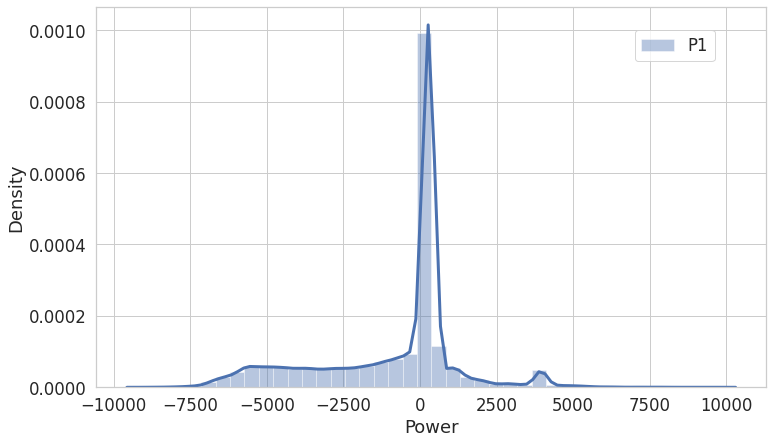

In [13]:
fig = plt.figure(figsize=(12,7))
sns.set(font_scale=1.5, style="whitegrid")
sns.distplot(ifh['AvgP3'],bins=40, kde=True, kde_kws={"lw": 3}, label='P1')
# sns.distplot(ifh['AvgP2'],bins=40, kde=True, kde_kws={"lw": 3}, label='P2')
# sns.distplot(ifh['AvgP3'],bins=40, kde=True, kde_kws={"lw": 3}, label='P3')
fig.legend(bbox_to_anchor=(0.85, 0.85))
plt.xlabel('Power')
plt.ylabel('Density')
#plt.savefig('Phase_A_Voltage_Distribution.pdf')
plt.show()

### Import DRH Data

In [14]:
drh_1 = pd.read_csv('CSV/DRH - Hioki 3360 20200806 to 20200817.CSV', skiprows=16)
drh_1.index = pd.to_datetime((drh_1['Date']), format='%Y-%m-%d %H:%M:%S')

In [15]:
drh_2 = pd.read_csv('CSV/DRH SWBD - Hioki PW3360 30sec 20200817 to 20201020.CSV', skiprows=16)
drh_2.index = pd.to_datetime((drh_2['Date']), format='%Y-%m-%d %H:%M:%S')

In [16]:
drh_3 = pd.read_csv('CSV/DRH SWBD - Hioki PW3360 30sec 20202010 to 20201218.CSV', skiprows=16)
drh_3.index = pd.to_datetime((drh_3['Date']), format='%d/%m/%Y %H:%M')

In [17]:
drh = pd.concat([drh_1, drh_2, drh_3])

In [18]:
drh.columns

Index(['Date', 'Etime', 'Status', 'Freq_Avg[Hz]', 'U1_Avg[V]', 'Ufnd1_Avg[V]',
       'Udeg1_Avg[deg]', 'I1_Avg[A]', 'Ifnd1_Avg[A]', 'Ideg1_Avg[deg]',
       'P1_Avg[W]', 'S1_Avg[VA]', 'Q1_Avg[var]', 'PF1_Avg', 'WP+1[Wh]',
       'WP-1[Wh]', 'WQLAG1[varh]', 'WQLEAD1[varh]', 'Ecost1', 'WP+dem1[Wh]',
       'WP-dem1[Wh]', 'WQLAGdem1[varh]', 'WQLEADdem1[varh]', 'Pdem+1[W]',
       'Pdem-1[W]', 'QdemLAG1[var]', 'QdemLEAD1[var]', 'PFdem1', 'I2_Avg[A]',
       'Ifnd2_Avg[A]', 'Ideg2_Avg[deg]', 'P2_Avg[W]', 'S2_Avg[VA]',
       'Q2_Avg[var]', 'PF2_Avg', 'WP+2[Wh]', 'WP-2[Wh]', 'WQLAG2[varh]',
       'WQLEAD2[varh]', 'Ecost2', 'WP+dem2[Wh]', 'WP-dem2[Wh]',
       'WQLAGdem2[varh]', 'WQLEADdem2[varh]', 'Pdem+2[W]', 'Pdem-2[W]',
       'QdemLAG2[var]', 'QdemLEAD2[var]', 'PFdem2', 'I3_Avg[A]',
       'Ifnd3_Avg[A]', 'Ideg3_Avg[deg]', 'P3_Avg[W]', 'S3_Avg[VA]',
       'Q3_Avg[var]', 'PF3_Avg', 'WP+3[Wh]', 'WP-3[Wh]', 'WQLAG3[varh]',
       'WQLEAD3[varh]', 'Ecost3', 'WP+dem3[Wh]', 'WP-dem3[Wh]',
 

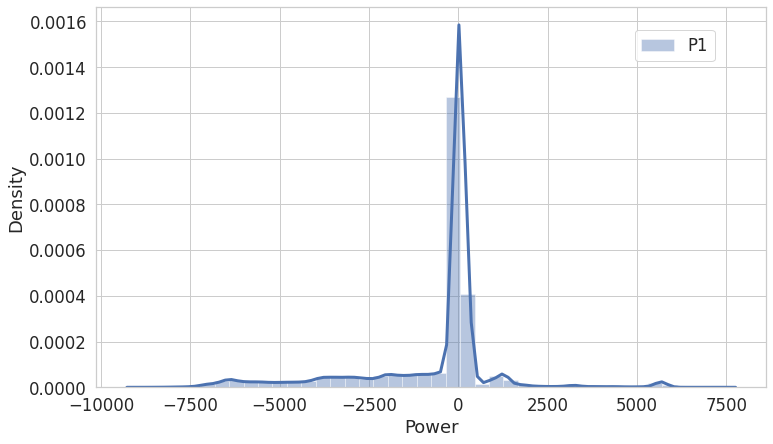

In [19]:
fig = plt.figure(figsize=(12,7))
sns.set(font_scale=1.5, style="whitegrid")
sns.distplot(drh['P1_Avg[W]'],bins=40, kde=True, kde_kws={"lw": 3}, label='P1')
# sns.distplot(ifh['AvgP2'],bins=40, kde=True, kde_kws={"lw": 3}, label='P2')
# sns.distplot(ifh['AvgP3'],bins=40, kde=True, kde_kws={"lw": 3}, label='P3')
fig.legend(bbox_to_anchor=(0.85, 0.85))
plt.xlabel('Power')
plt.ylabel('Density')
#plt.savefig('Phase_A_Voltage_Distribution.pdf')
plt.show()

### Import Kiosk Data

In [20]:
kiosk_1 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20200803 to 20200817 with n.CSV')
kiosk_2 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20200817 to 20200921 with n.CSV')
kiosk_3 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20201019 to 20201123 with n.CSV')

/home/brendan/jupyter_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
kiosk = pd.concat([kiosk_1, kiosk_2, kiosk_3])
kiosk.index = pd.to_datetime((kiosk['Date']+' '+kiosk['Time']), format='%Y/%m/%d %H:%M:%S')

In [22]:
kiosk.columns

Index(['Date', 'Time', 'MaxFreq', 'MaxUrms1', 'MaxUrms2', 'MaxUrms3',
       'MaxIrms1', 'MaxIrms2', 'MaxIrms3', 'MaxIrms4', 'MaxP1', 'MaxP2',
       'MaxP3', 'MaxS1', 'MaxS2', 'MaxS3', 'MaxQ1', 'MaxQ2', 'MaxQ3', 'MaxPF1',
       'MaxPF2', 'MaxPF3', 'MinFreq', 'MinUrms1', 'MinUrms2', 'MinUrms3',
       'MinIrms1', 'MinIrms2', 'MinIrms3', 'MinIrms4', 'MinP1', 'MinP2',
       'MinP3', 'MinS1', 'MinS2', 'MinS3', 'MinQ1', 'MinQ2', 'MinQ3', 'MinPF1',
       'MinPF2', 'MinPF3', 'AvgFreq', 'AvgUrms1', 'AvgUrms2', 'AvgUrms3',
       'AvgIrms1', 'AvgIrms2', 'AvgIrms3', 'AvgIrms4', 'AvgP1', 'AvgP2',
       'AvgP3', 'AvgS1', 'AvgS2', 'AvgS3', 'AvgQ1', 'AvgQ2', 'AvgQ3', 'AvgPF1',
       'AvgPF2', 'AvgPF3', 'MaxUrms4', 'MinUrms4', 'AvgUrms4'],
      dtype='object')

### Import PV Data

In [23]:
pv_1 = pd.read_csv('CSV/SBRC Office PV - Hioki PW3198 30sec 20200803 to 20200817.CSV')
pv_2 = pd.read_csv('CSV/SBRC Office PV - Hioki PW3198 30sec 20200817 to 20200918.CSV')
pv_3 = pd.read_csv('CSV/SBRC Office PV - Hioki PW3360 30sec 20200918 to 20201020.CSV', skiprows=16)
pv_4 = pd.read_csv('CSV/SBRC Office PV - Hioki PW3360 30sec 20201023 to 20201213.CSV', skiprows=16)
pv_4 = pv_4.drop(pv_4.index[0])
pv_5 = pd.read_csv('CSV/SBRC Office PV - Hioki PW3360 30sec 20201213 to 20201218.CSV', skiprows=16)
pv_5 = pv_5.drop(pv_5.index[-1])

In [24]:
pv_4['Date'] = pv_4['Date'] + pv_4['Etime'].apply(lambda x : x[-3:])
pv_5['Date'] = pv_5['Date'] + pv_5['Etime'].apply(lambda x : x[-3:])

In [26]:
pv_1.index = pd.to_datetime((pv_1['Date']+' '+pv_1['Time']), format='%Y/%m/%d %H:%M:%S')
pv_2.index = pd.to_datetime((pv_2['Date']+' '+pv_2['Time']), format='%Y/%m/%d %H:%M:%S')
pv_3.index = pd.to_datetime((pv_3['Date']), format='%Y-%m-%d %H:%M:%S')
pv_4.index = pd.to_datetime((pv_4['Date']), format='%d/%m/%Y %H:%M:%S')
pv_5.index = pd.to_datetime((pv_5['Date']), format='%d/%m/%Y %H:%M:%S')

In [27]:
pv_aug = pd.concat([pv_1, pv_2])
pv_oct = pd.concat([pv_3, pv_4, pv_5])

## Create Combined DF

In [28]:
mg = pd.DataFrame(index=drh.index)

In [29]:
#Import Kiosk Voltage
mg['TX_Va'] = kiosk['AvgUrms1']
mg['TX_Vb'] = kiosk['AvgUrms2']
mg['TX_Vc'] = kiosk['AvgUrms3']

In [30]:
#Import SBRC Data
mg['SB_Va'] = sbrc['AvgUrms1']
mg['SB_Vb'] = sbrc['AvgUrms2']
mg['SB_Vc'] = sbrc['AvgUrms3']

mg['SB_Pa'] = sbrc['AvgP1']
mg['SB_Pb'] = sbrc['AvgP2']
mg['SB_Pc'] = sbrc['AvgP3']

mg['SB_Qa'] = sbrc['AvgQ1']
mg['SB_Qb'] = sbrc['AvgQ2']
mg['SB_Qc'] = sbrc['AvgQ3']

In [31]:
#Import IFH Data
mg['IF_Vc'] = ifh['AvgUrms3']
mg['IF_Pc'] = ifh['AvgP3']
mg['IF_Qc'] = ifh['AvgQ3']

In [32]:
#Import DRH Data
mg['DR_Va'] = drh['U1_Avg[V]']
mg['DR_Pa'] = drh['P1_Avg[W]']
mg['DR_Qa'] = drh['Q1_Avg[var]']

In [33]:
Va = pd.concat([pv_aug['AvgUrms1'],pv_oct['Ufnd1_Avg[V]']])
mg['PV_Va'] = Va[~Va.index.duplicated(keep='first')]

Vb = pd.concat([pv_aug['AvgUrms2'],pv_oct['Ufnd2_Avg[V]']])
mg['PV_Vb'] = Vb[~Vb.index.duplicated(keep='first')]

Vc = pd.concat([pv_aug['AvgUrms3'],pv_oct['Ufnd3_Avg[V]']])
mg['PV_Vc'] = Vc[~Vc.index.duplicated(keep='first')]

<AxesSubplot:xlabel='Date'>

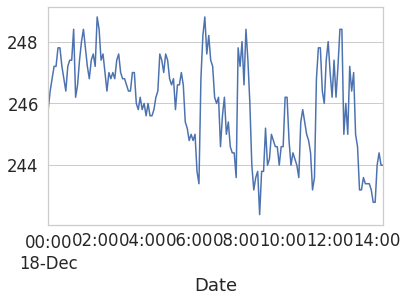

In [35]:
mg['PV_Vb'].loc['2020-12-18'].resample('5min').mean().plot()

In [28]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 386489 entries, 2020-08-06 09:23:00 to 2020-12-18 14:15:00
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TX_Va   233723 non-null  float64
 1   TX_Vb   233723 non-null  float64
 2   TX_Vc   233723 non-null  float64
 3   SB_Va   233744 non-null  float64
 4   SB_Vb   233744 non-null  float64
 5   SB_Vc   233744 non-null  float64
 6   SB_Pa   233744 non-null  float64
 7   SB_Pb   233744 non-null  float64
 8   SB_Pc   233744 non-null  float64
 9   SB_Qa   233744 non-null  float64
 10  SB_Qb   233744 non-null  float64
 11  SB_Qc   233744 non-null  float64
 12  IF_Vc   302435 non-null  float64
 13  IF_Pc   302435 non-null  float64
 14  IF_Qc   302435 non-null  float64
 15  DR_Va   386483 non-null  float64
 16  DR_Pa   386483 non-null  float64
 17  DR_Qa   386483 non-null  float64
dtypes: float64(18)
memory usage: 56.0 MB


In [60]:
mg_reg = mg.dropna().resample('5min').mean()
mg_reg_dr = mg_reg[(mg_reg['DR_Va']>220)]
mg_reg_if = mg_reg[mg_reg['IF_Vc']>220]

## Train DRH Voltage

In [61]:
X = mg_reg_dr[['TX_Va', 'SB_Pa', 'SB_Pb', 'SB_Pc','SB_Qa', 'SB_Qb', 'SB_Qc', 'IF_Pc', 'IF_Qc', 'DR_Pa', 'DR_Qa']]
#X = mg_reg[['TX_Va', 'SB_Pa','SB_Qa', 'DR_Pa', 'DR_Qa']]

In [62]:
y = mg_reg_dr['DR_Va']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [64]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
r2_val = r2_score(predictions, y_test)
r2_val

0.9866913463417584

<AxesSubplot:ylabel='DR_Va'>

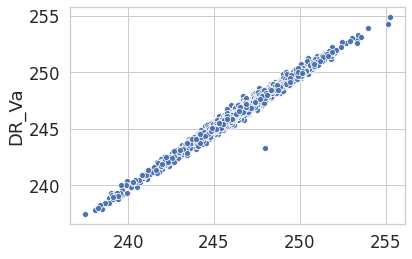

In [65]:
sns.scatterplot(x=predictions, y=y_test)

In [66]:
cdf = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coeff'])

In [67]:
cdf

,Coeff
TX_Va,0.991462
SB_Pa,-0.000044
SB_Pb,-0.000024
SB_Pc,0.000041
SB_Qa,-0.000095
SB_Qb,0.000062
SB_Qc,-0.000005
IF_Pc,0.000214
IF_Qc,-0.000054
DR_Pa,-0.000842


## Train IFH Voltage

In [37]:
X = mg_reg_if[['TX_Vc', 'SB_Pa', 'SB_Pb', 'SB_Pc','SB_Qa', 'SB_Qb', 'SB_Qc', 'IF_Pc', 'IF_Qc', 'DR_Pa', 'DR_Qa']]

In [38]:
y = mg_reg_if['IF_Vc']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [40]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
r2_val = r2_score(predictions, y_test)
r2_val

0.9974503748241317

<AxesSubplot:ylabel='IF_Vc'>

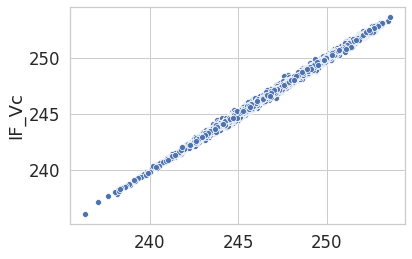

In [41]:
sns.scatterplot(x=predictions, y=y_test)

In [42]:
cdf = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
TX_Vc,9.959864e-01
SB_Pa,-1.551346e-05
SB_Pb,4.517250e-05
SB_Pc,-4.132968e-05
SB_Qa,3.499573e-05
SB_Qb,6.228904e-07
SB_Qc,-7.689713e-05
IF_Pc,-7.877449e-04
IF_Qc,-1.179333e-04
DR_Pa,-1.825024e-07


## Train SBRC

### Phase A

In [43]:
mg_reg_sb_a = mg_reg[mg_reg['SB_Va']>220]

In [44]:
X = mg_reg_if[['TX_Va', 'SB_Pa', 'SB_Pb', 'SB_Pc','SB_Qa', 'SB_Qb', 'SB_Qc', 'IF_Pc', 'IF_Qc', 'DR_Pa', 'DR_Qa']]
y = mg_reg_if['SB_Va']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
r2_val = r2_score(predictions, y_test)
r2_val

0.9993759380098752

<AxesSubplot:ylabel='SB_Va'>

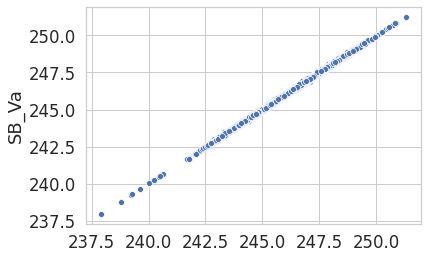

In [47]:
sns.scatterplot(x=predictions, y=y_test)

In [48]:
cdf = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
TX_Va,1.002835e+00
SB_Pa,-3.983668e-05
SB_Pb,-2.062332e-05
SB_Pc,3.109115e-05
SB_Qa,-6.708593e-05
SB_Qb,2.981261e-05
SB_Qc,5.633235e-06
IF_Pc,1.565287e-06
IF_Qc,8.093654e-07
DR_Pa,-6.475938e-07


### Phase B

In [49]:
mg_reg_sb_b = mg_reg[mg_reg['SB_Vb']>220]

In [50]:
X = mg_reg_if[['TX_Vb', 'SB_Pa', 'SB_Pb', 'SB_Pc','SB_Qa', 'SB_Qb', 'SB_Qc', 'IF_Pc', 'IF_Qc', 'DR_Pa', 'DR_Qa']]
y = mg_reg_if['SB_Vb']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [52]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
r2_val = r2_score(predictions, y_test)
r2_val

0.9374813406320681

<AxesSubplot:ylabel='SB_Vb'>

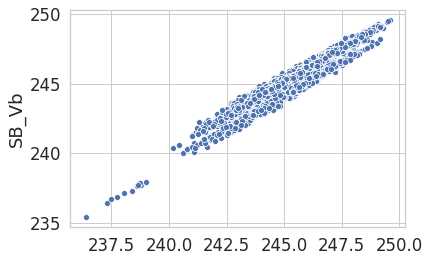

In [53]:
sns.scatterplot(x=predictions, y=y_test)

In [54]:
cdf = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
TX_Vb,1.031181
SB_Pa,0.000041
SB_Pb,-0.000021
SB_Pc,-0.000031
SB_Qa,0.000101
SB_Qb,-0.000173
SB_Qc,0.000043
IF_Pc,-0.000031
IF_Qc,-0.000502
DR_Pa,-0.000038


### Phase C

In [55]:
mg_reg_sb_c = mg_reg[mg_reg['SB_Vc']>220]

In [56]:
X = mg_reg_if[['TX_Vc', 'SB_Pa', 'SB_Pb', 'SB_Pc','SB_Qa', 'SB_Qb', 'SB_Qc', 'IF_Pc', 'IF_Qc', 'DR_Pa', 'DR_Qa']]
y = mg_reg_if['SB_Vc']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [58]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
r2_val = r2_score(predictions, y_test)
r2_val

0.9994544664726802

In [59]:
cdf = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
TX_Vc,1.001149e+00
SB_Pa,-1.157453e-05
SB_Pb,3.672287e-05
SB_Pc,-3.878165e-05
SB_Qa,3.215512e-05
SB_Qb,-1.694063e-05
SB_Qc,-5.257170e-05
IF_Pc,-1.764766e-07
IF_Qc,-1.532209e-05
DR_Pa,-1.503423e-06
